### ADML MEP Script
##### Scripts for calculating specific ML tasks! Dave B. HSLU

### Cosine Similarity and Distance

In [7]:
# Cosine Similarity
from numpy import dot
from numpy.linalg import norm
a = [3, 14, 18, 23]
b = [12, 16, 21, 29]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print("Cosine Similarity: " + str(cos_sim))
print("Cosine Distance: " + str(1 - cos_sim) + "\n")

a = [0.6,0,1,0.1]
b = [0.8,0.1,0.1,0.2]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print("Cosine Similarity: " + str(cos_sim))
print("Cosine Distance: " + str(1 - cos_sim))

Cosine Similarity: 0.9782608695652174
Cosine Distance: 0.021739130434782594

Cosine Similarity: 0.6126916290641964
Cosine Distance: 0.3873083709358036


### Euclidean Distance

In [11]:
# Euclidean Distance
point_1 = (22,18,286)
point_2 = (183,1,350)
def naive_euclidian_distance(point1, point2):
    differences = [point1[x] - point2[x] for x in range(len(point1))]
    differences_squared = [difference ** 2 for difference in differences]
    sum_of_squares = sum(differences_squared)
    return sum_of_squares ** 0.5
print(naive_euclidian_distance(point_1, point_2))

174.08618555186968


## Sigmoid

In [12]:
import numpy as np
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

sigmoid(71-70)+sigmoid(0-70)

0.7310585786300049

## Jaccard Similarity

In [3]:
def jaccard_similarity(list1, list2):
    similarity = 0
    # START YOUR CODE
    geschnittenList = list(set(list1) & set(list2))
    vereintList = list(set(list1) | set(list2))
    similarity = len(geschnittenList) / len(vereintList)
    # END YOUR CODE
    return similarity

x = ['aroma','includ','tropic','fruit','broom','brimston','dri','herb','palat','over','express','offer','unripen','appl','citrus','dri','sage','alongsid','brisk','acid']
y = ['ripe','fruiti','wine','smooth','still','structur','firm','tannin','fill','juici','berri','fruit','freshen','acid','alreadi','drinkabl','although','certain','better','2016']

jaccard_similarity(x,y)


0.05405405405405406

## Mean Absolute Error (MAE)

In [ ]:
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
mae(y_test, y_pred)

## R2 Score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

## F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

### Linear Regression Model

In [ ]:
## Linear Regression model
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# read data
df_house = pd.read_csv("kc_house_data.csv")
# select 2 features
df_house = df_house[["price","sqft_living"]]
# split data in train and test
train_house, test_house = train_test_split(df_house, test_size=0.8, random_state=42)
# normalize data
scaler = MinMaxScaler()
train_house = pd.DataFrame(scaler.fit_transform(train_house), columns=train_house.columns, index=train_house.index)
test_house = pd.DataFrame(scaler.transform(test_house), columns=test_house.columns, index=test_house.index)
# split data in x and y
X_train_house = train_house[["sqft_living"]]
y_train_house = train_house[["price"]]

X_test_house = test_house[["sqft_living"]]
y_test_house = test_house[["price"]]

def fit(X, y):
    thetas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return thetas
thetas = fit(X_train_house, y_train_house)
# predict
def predict(X, thetas):
    y_pred = np.dot(X, thetas)
    return y_pred
y_pred_house = predict(X_train_house, thetas)
y_pred_house

# check performance with test-data
y_pred_test_house = predict(X_test_house, thetas)
r2_house = r2_score(y_test_house, y_pred_test_house)
print("R2: ", r2_house)

## Adding polynomial feature
#copying data
X_train_deg2 = X_train_house.copy()
X_train_deg2["sqft_living**2"] = X_train_deg2["sqft_living"] * X_train_deg2["sqft_living"]

X_test_deg2 = X_test_house.copy()
X_test_deg2["sqft_living^2"] = X_test_deg2["sqft_living"] * X_test_deg2["sqft_living"]

# Fit the model
thetas_deg2 = fit(X_train_deg2, y_train_house)
# check performance
y_pred_test_deg2 = predict(X_test_deg2, thetas_deg2)
r2_house_deg2 = r2_score(y_test_house, y_pred_test_deg2)
print("R2: ", r2_house_deg2)

## Calculate Accuracy and Sensitivity


In [25]:
TP = 80
FP = 10
TN = 500
FN = 20
print("Confusion Matrix")
print('''          | Predicted
Act       | NO    | YES   |
ua    NO  | {}    | {}    |
l     Yes | {}    | {}    |
      '''.format(TN, FP, FN, TP))

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = (TN+TP)/(TN+TP+FN+FP)
precision = TP/(TP+FP)
F1 = (2*precision*sensitivity)/(precision+sensitivity)
print('''
sensitivity: {}
specificity: {}
accuracy: {}
precision: {}
F1: {}
'''.format(sensitivity, specificity, accuracy, precision,F1))

Confusion Matrix
          | Predicted
Act       | NO    | YES   |
ua    NO  | 500    | 10    |
l     Yes | 20    | 80    |
      

sensitivity: 0.8
specificity: 0.9803921568627451
accuracy: 0.9508196721311475
precision: 0.8888888888888888
F1: 0.8421052631578948



## Logistic Regression and Sigmoid function

C:\Users\Dave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


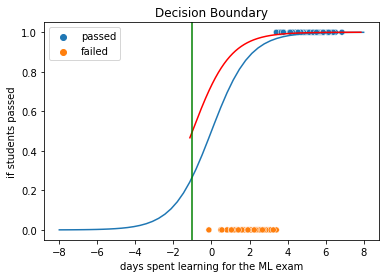

  0%|          | 0/100000 [00:00<?, ?it/s]

Epoch 1 -  cost: 0.6119730071719619
Epoch 1000 -  cost: 0.12086937158148751
Epoch 2000 -  cost: 0.08079899913226457
Epoch 3000 -  cost: 0.06476826544239878
Epoch 4000 -  cost: 0.055808742199970965
Epoch 5000 -  cost: 0.04996481026003407
Epoch 6000 -  cost: 0.04579404147521661
Epoch 7000 -  cost: 0.042636133037945854
Epoch 8000 -  cost: 0.04014298302666868
Epoch 9000 -  cost: 0.038112366131508264
Epoch 10000 -  cost: 0.036418134779343074
Epoch 11000 -  cost: 0.03497718608080114
Epoch 12000 -  cost: 0.03373235651869446
Epoch 13000 -  cost: 0.03264292065864821
Epoch 14000 -  cost: 0.031679007575622545
Epoch 15000 -  cost: 0.03081816394176933
Epoch 16000 -  cost: 0.030043154735148674
Epoch 17000 -  cost: 0.029340508672593253
Epoch 18000 -  cost: 0.028699528442530257
Epoch 19000 -  cost: 0.028111600332694362
Epoch 20000 -  cost: 0.027569702098325335
Epoch 21000 -  cost: 0.027068045319378176
Epoch 22000 -  cost: 0.02660181098584947
Epoch 23000 -  cost: 0.026166950967357137
Epoch 24000 -  cos

C:\Users\Dave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


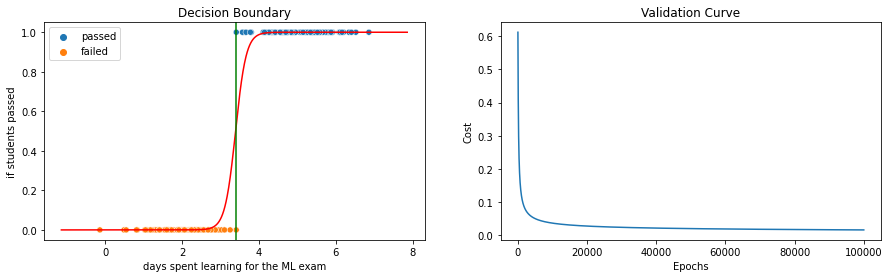

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import defaultdict
from tqdm.notebook import tqdm
import pandas as pd

# generate data
students_passed = np.random.normal(5,0.7,100)
students_failed = np.random.normal(2,0.7,100)
zeros = [0]*100
ones = [1]*100
X = np.concatenate((students_passed, students_failed))
y = np.concatenate((ones, zeros))


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

x = np.linspace(-8, 8)
plt.plot(x, sigmoid(x))


def predict(X, theta0, theta1):
    z = theta0 +  theta1 * X
    y_pred = sigmoid(z)
    return y_pred

theta0 = 1.0
theta1 = 1.0

y_pred = predict(X, theta0, theta1)

# cost function
def cost_function(y, y_pred):
    n = y.shape[0]
    cost = -(1.0 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# for applying gradient descent, we define the gradient.
def gradient(X, y, theta0, theta1):
    y_pred = predict(X, theta0, theta1)
    diff = y_pred - y
    
    n = len(X)
    grad_theta0 = np.sum(diff) / n
    grad_theta1 = np.dot(diff, X.T) / n
    
    return grad_theta0, grad_theta1


# Gradient Descent
# Now we are ready to determine the optimal values for the parameters and using the gradient descent algorithm.
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for i in tqdm(range(num_epochs)):
        # calculate gradients
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        
        # update model parameters theta0 and theta1
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        # calculate the current costs
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost_function(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)
        
        if i == 0 or (i+1) % display_every == 0:
            print("Epoch {} -  cost: {}".format(i+1, curr_cost))
        
    return theta0, theta1, hist

# plot functions
def plot_validation_curve(costs, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_ylabel("Cost")
    ax.set_title("Validation Curve")
    ax.set_xlabel("Epochs")
    ax.plot(costs)

def plot_decision_boundary(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min()-1, X.max()+1, 0.01).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    ax.plot(x, y_pred, color="r")
    ax.axvline(-theta0/theta1, color="g")
    ax.set_title("Decision Boundary")
    
legend_map = {0: 'failed', 1: 'passed'}
ax = sns.scatterplot(X, y, hue=pd.Series(y).map(legend_map))
ax.set_xlabel('days spent learning for the ML exam')
ax.set_ylabel('if students passed')
plot_decision_boundary(X, theta0, theta1, ax)
plt.show()


# Run gradient descent algorithm
# Let's run the gradient descent algorithm!
alpha = 0.1
num_epochs = 100000

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=1000)

fig, ax = plt.subplots(ncols=2, figsize=(15,4))

# scatter plot
legend_map = {0: 'failed', 1: 'passed'}
ax[0] = sns.scatterplot(X, y, hue=pd.Series(y).map(legend_map), ax=ax[0])
ax[0].set_xlabel('days spent learning for the ML exam')
ax[0].set_ylabel('if students passed')
plot_decision_boundary(X, theta0, theta1, ax[0])

# validation curve
plot_validation_curve(hist["cost"], ax=ax[1])

### Determine the normal vector w 
steigung von W berechnen und anschliessen geteilt durch länge rechnen
anschliessend punkt auf gerade bestimmen
nacher 
https://www.mycloud.swisscom.ch/s/S0051A2360516F854AA2D2130132540B416B31BA207

## Gini impurity

In [16]:
#Calculate Gini Impurity of Feature "Color"
#------------------------------------------#
#red
r_fast = 0
r_shelf = 1
r_normal =  3
r_sum = r_fast+r_shelf+r_normal
r_gini = 1- ((r_fast/r_sum)**2 + (r_shelf/r_sum)**2 + (r_normal/r_sum)**2)
#white
w_fast = 2
w_shelf = 2
w_normal = 2
w_sum = w_fast+w_shelf+w_normal
w_gini = 1- ((w_fast/w_sum)**2 + (w_shelf/w_sum)**2 + (w_normal/w_sum)**2)
#silver
s_fast = 2
s_shelf = 1
s_normal = 1
s_sum = s_fast+s_shelf+s_normal
s_gini = 1- ((s_fast/s_sum)**2 + (s_shelf/s_sum)**2 + (s_normal/s_sum)**2)
#black
b_fast = 4
b_shelf = 2
b_normal = 0
b_sum = b_fast+b_shelf+b_normal
b_gini = 1- ((b_fast/b_sum)**2 + (b_shelf/b_sum)**2 + (b_normal/b_sum)**2)

total = r_sum+w_sum+s_sum+b_sum
print(total)

print("gini total: " + str(r_gini*(r_sum/total)+(w_gini*(w_sum/total)+(s_gini*(s_sum/total))+(b_gini*(b_sum/total)))))


20
gini total: 0.5333333333333334


In [17]:
#Calculate Gini Impurity of Feature "Seats". The feature should be split into three categories:
# one   -> "Seats < 3"
one_fast = 3
one_shelf = 0
one_normal = 0
one_sum = one_fast+one_shelf+one_normal
one_gini = 1- ((one_fast/one_sum)**2 + (one_shelf/one_sum)**2 +(one_normal/one_sum)**2 )

# two   -> "Seats ≥ 3 and Seats < 4.5"
two_fast = 2
two_shelf = 1
two_normal = 0
two_sum = two_fast+two_shelf+two_normal
two_gini = 1- ((two_fast/two_sum)**2 + (two_shelf/two_sum)**2 +(two_normal/two_sum)**2 )

# three ->"Seats ≥ 4.5"
three_fast = 3
three_shelf = 5
three_normal = 6
three_sum = three_fast+three_shelf+three_normal
three_gini = 1- ((three_fast/three_sum)**2 + (three_shelf/three_sum)**2 +(three_normal/three_sum)**2 )


total = one_sum+two_sum+three_sum
print(total)
print(one_gini)
print(two_gini)
print(three_gini)

print("gini total: " + str(one_gini*(one_sum/total) + (two_gini*(two_sum/total) + (three_gini*(three_sum/total)))))

20
0.0
0.4444444444444444
0.6428571428571429
gini total: 0.5166666666666667


In [18]:
#Calculate Gini Impurity of Color after Seats split for the node Seats ≥ 4.5
#red
r_fast = 0
r_shelf = 1
r_normal =  3
r_sum = r_fast+r_shelf+r_normal
r_gini = 1- ((r_fast/r_sum)**2 + (r_shelf/r_sum)**2 + (r_normal/r_sum)**2)
#white
w_fast = 0
w_shelf = 2
w_normal = 2
w_sum = w_fast+w_shelf+w_normal
w_gini = 1- ((w_fast/w_sum)**2 + (w_shelf/w_sum)**2 + (w_normal/w_sum)**2)
#silver
s_fast = 0
s_shelf = 1
s_normal = 1
s_sum = s_fast+s_shelf+s_normal
s_gini = 1- ((s_fast/s_sum)**2 + (s_shelf/s_sum)**2 + (s_normal/s_sum)**2)
#black
b_fast = 3
b_shelf = 1
b_normal = 0
b_sum = b_fast+b_shelf+b_normal
b_gini = 1- ((b_fast/b_sum)**2 + (b_shelf/b_sum)**2 + (b_normal/b_sum)**2)

total = r_sum+w_sum+s_sum+b_sum
print(total)

print("gini total: " + str(r_gini*(r_sum/total)+(w_gini*(w_sum/total)+(s_gini*(s_sum/total))+(b_gini*(b_sum/total)))))

14
gini total: 0.42857142857142855


## Association Rules

In [19]:
from ctypes import sizeof
from re import I
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [['oats', 'lego', 'teddybear', 'rc car'],
                ['oats', 'red coat', 'gloves', 'teddybear', 'doll', 'warm boot'],
                ['lego', 'red jelly bag cap', 'rc car', 'doll'],
                ['lego', 'oats', 'large red bag', 'gift wrap paper', 'warm boot']]
transactions = pd.DataFrame(data={"Items":transactions}, index=range(1,5))
transactions.index.name = 'Id'

# Support
support = {}
for item in ['lego', 'oats', 'doll']:
    support[item] = transactions.Items.map(lambda x: item in x).sum() / transactions.shape[0] # support of 'lego'
print("Support: " + str(support))

Support: {'lego': 0.75, 'oats': 0.75, 'doll': 0.5}


In [20]:
# Confidence
#Calculate the confidence of ['lego', 'oats'] -> ['teddybear']
XUY = ['lego', 'oats','teddybear']

XUY_frequency = 0.25
# confidence_lego_oats-teddybear = 0.25 / 0.5
confidence = XUY_frequency / ( transactions.Items.map(lambda x: 'lego' in x and 'oats' in x).sum() / transactions.shape[0]  )
print("Confidence is: " + str(confidence))
# -------------------------------------------

Confidence is: 0.5


In [21]:
# Apriori Algorithm
#minimum support of 0.5 and minimum confidence of 0.75
te = TransactionEncoder()
te_ary = te.fit_transform(transactions.Items.values.tolist())
df = pd.DataFrame(te_ary, columns=te.columns_)
print(apriori(df,min_support=0.5,use_colnames=True,))







# Execute the following code to show the solution. We will see how to use this library in a minute.
te = TransactionEncoder()
te_ary = te.fit_transform(transactions.Items.values.tolist())
df = pd.DataFrame(te_ary, columns=te.columns_)
freq_itemsets = apriori(df, use_colnames=True, min_support=0.5)
freq_itemsets
# Execute the following code to show the solution
association_rules(freq_itemsets, metric='confidence', min_threshold=0.75)



   support           itemsets
0     0.50             (doll)
1     0.75             (lego)
2     0.75             (oats)
3     0.50           (rc car)
4     0.50        (teddybear)
5     0.50        (warm boot)
6     0.50       (oats, lego)
7     0.50     (rc car, lego)
8     0.50  (oats, teddybear)
9     0.50  (oats, warm boot)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rc car),(lego),0.5,0.75,0.5,1.0,1.333333,0.125,inf
1,(teddybear),(oats),0.5,0.75,0.5,1.0,1.333333,0.125,inf
2,(warm boot),(oats),0.5,0.75,0.5,1.0,1.333333,0.125,inf


## PCA

In [22]:
import numpy as np

# Eigenvalues and Eigenvectors
a = np.array([[1,0,0],[0,3,0], [0,0, 2]])
np.linalg.eig(a)

(array([1., 3., 2.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))